In [1]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
Y_train = pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
Y_test = pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
print(Y_train.shape, Y_test.shape)

(1828, 9) (624, 9)


In [3]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
print(X_train.shape, X_test.shape)

(1828, 304304) (624, 304304)


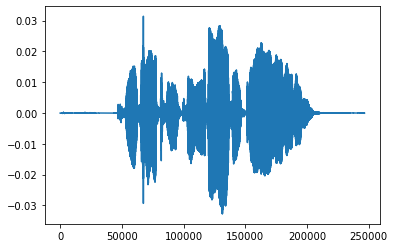

In [4]:
ts1 = X_train[600]
plt.plot(ts1)
plt.show()

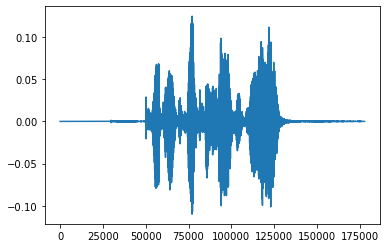

In [5]:
ts2 = X_train[1200]
plt.plot(ts2)
plt.show()

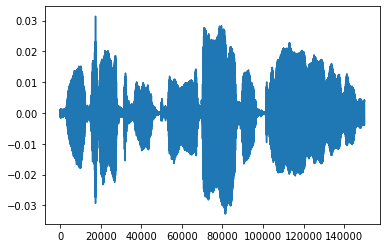

In [6]:
plt.plot(ts1[50000:200000])
plt.show()

# Euclidean distance

In [7]:
from scipy.spatial.distance import euclidean


In [8]:
dist = euclidean(ts1[50000:130000], ts2[50000:130000])
dist

6.326214201259434

# Manhattan

In [9]:
from scipy.spatial.distance import cityblock

In [10]:
dist = cityblock(ts1[50000:130000], ts2[50000:130000])
dist

1250.7211608886719

# DTW

In [11]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [12]:
dist = dtw(ts1[50000:130000], ts2[50000:130000])
dist
#quello che ci mette più tempo

3.8576993036098366

# Approximation

In [15]:
from pyts.approximation import DiscreteFourierTransform

In [20]:
n_coefs = 32

dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts1_dft = dft.fit_transform(ts1[50000:130000].reshape(1, -1))

In [29]:
ts1[50000:130000].shape[0]

80000

In [30]:
len(ts1[50000:130000])#.shape[0]

80000

In [24]:
ts1_dft.shape

(1, 32)

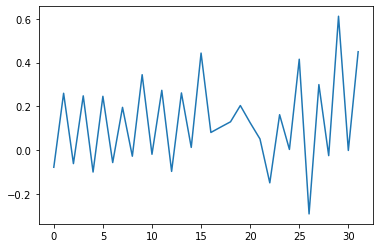

In [26]:
plt.plot(ts1_dft.ravel())
plt.show()

In [27]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [31]:
ts1_dft_inv = dft_inverse_trasform(ts1_dft, n_coefs=n_coefs, n_timestamps=len(ts1[50000:130000]))
ts1_dft_inv

array([[0.00011311, 0.00011312, 0.00011313, ..., 0.00011309, 0.0001131 ,
        0.00011311]])

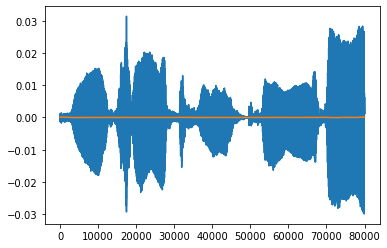

In [33]:
plt.plot(ts1[50000:130000].ravel())
plt.plot(ts1_dft_inv.ravel())
plt.show()